<a href="https://colab.research.google.com/github/eshmeetkohli/Weather_Prediction_HMM/blob/main/Weather_Prediction_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# New Section

In [ ]:
df = pd.read_csv('./sample_data/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
#some basic information
df.groupby('weather').count()

,date,precipitation,temp_max,temp_min,wind
weather,,,,,
drizzle,53,53,53,53,53
fog,101,101,101,101,101
rain,641,641,641,641,641
snow,26,26,26,26,26
sun,640,640,640,640,640


In [ ]:
#We can see that the precipitation is 0 when it is drizzle
df.loc[(df['weather']=='drizzle') & (df.precipitation != 0)]

,date,precipitation,temp_max,temp_min,wind,weather


In [ ]:
#Precipication is again 0 when it is sunny
df.loc[(df.weather == 'sun') & (df.precipitation)!=0]

,date,precipitation,temp_max,temp_min,wind,weather


In [ ]:
#When we have snow, the precipitation is never 0, same when it is rainy
df.loc[df['weather'] == 'snow']

,date,precipitation,temp_max,temp_min,wind,weather
13,2012-01-14,4.1,4.4,0.6,5.3,snow
14,2012-01-15,5.3,1.1,-3.3,3.2,snow
15,2012-01-16,2.5,1.7,-2.8,5.0,snow
16,2012-01-17,8.1,3.3,0.0,5.6,snow
17,2012-01-18,19.8,0.0,-2.8,5.0,snow
18,2012-01-19,15.2,-1.1,-2.8,1.6,snow
19,2012-01-20,13.5,7.2,-1.1,2.3,snow
56,2012-02-26,1.3,5.0,-1.1,3.4,snow
58,2012-02-28,3.6,6.7,-0.6,4.2,snow
59,2012-02-29,0.8,5.0,1.1,7.0,snow


In [ ]:
#When it is foggy, again precipitation = 0
df.loc[(df['weather'] == 'fog') & (df['precipitation'] != 0)]

,date,precipitation,temp_max,temp_min,wind,weather


In [ ]:
#one hot encoder weather
m = len(df['weather'])
encode_weather = np.zeros(m)
for i in range(m):
    weather = -1
    if df['weather'][i] == 'sun':
        weather = 0
    if df['weather'][i] == 'rain':
        weather = 1
    if df['weather'][i] == 'snow':
        weather = 2
    if df['weather'][i] == 'drizzle':
        weather = 3
    if df['weather'][i] == 'fog':
        weather = 4
    encode_weather[i] = weather
df['Encode Weather'] = encode_weather

In [ ]:
from datetime import datetime
arr_date = df['date']
season = np.zeros(df.shape[0])
duration = len(arr_date)
for i in range(duration):
    date = datetime.strptime(arr_date[i], '%Y-%m-%d')
    month = date.month
    if month == 12 or month == 1 or month == 2 or month == 3:
        season[i] = 0 #winter
    if month == 4 or month == 5 or month == 6:
        season[i] = 1 #spring
    if month == 7 or month == 8:
        season[i] = 2 #summer
    if month == 9 or month == 10 or month == 11:
        season[i] = 3 #autumn
df['Encode Season'] = season

In [ ]:
max_temp = df['temp_min'].max()
min_temp = df['temp_min'].min()
max_wind = df['wind'].max()
min_wind = df['wind'].min()
print("max of temp_min:", max_temp)
print("min of temp_min:", min_temp)
print("max of wind:", max_wind)
print("min of wind:", min_wind)

max of temp_min: 18.3
min of temp_min: -7.1
max of wind: 9.5
min of wind: 0.4


In [ ]:
#We will see how many days it is snowy when the degree is above zero
#And how many day it is rainy when the degree is below zero
count_rain_below_zero = 0
count_snow_above_zero = 0
m = df.shape[0]
count_snow = 0
count_rain = 0
for i in range(m):
    if df['weather'][i] == 'snow':
        count_snow += 1
    if df['weather'][i] == 'rain':
        count_rain += 1
for i in range(m):
    if df['temp_min'][i] <= 0.0:
        if df['weather'][i] == 'rain':
            count_rain_below_zero += 1
            print("Min temp when it rains:", df['temp_min'][i])
    else:
        if df['weather'][i] == 'snow':
            print("Min temp when it snows above zero:", df['temp_min'][i])
            count_snow_above_zero += 1

print(count_snow_above_zero)
print(count_rain_below_zero)
print(count_snow)
print(count_rain)

Min temp when it snows above zero: 0.6
Min temp when it snows above zero: 1.1
Min temp when it snows above zero: 0.6
Min temp when it snows above zero: 0.6
Min temp when it snows above zero: 5.6
Min temp when it snows above zero: 0.6
Min temp when it rains: -0.6
Min temp when it rains: -1.1
Min temp when it snows above zero: 2.8
Min temp when it snows above zero: 0.6
Min temp when it snows above zero: 3.3
Min temp when it snows above zero: 0.6
Min temp when it snows above zero: 1.7
Min temp when it rains: -1.7
Min temp when it snows above zero: 2.8
Min temp when it rains: -1.7
Min temp when it snows above zero: 2.2
Min temp when it rains: -0.5
Min temp when it snows above zero: 0.6
Min temp when it rains: 0.0
Min temp when it rains: -0.5
Min temp when it rains: 0.0
Min temp when it rains: 0.0
Min temp when it rains: 0.0
Min temp when it rains: -3.8
14
11
26
641


In [ ]:
m = df.shape[0]
encode_temp = np.zeros(m)
count_very_cold = 0
count_cold = 0
count_cool = 0
count_warm = 0
for i in range(m):
    if df['temp_min'][i] <= 2.8:
        encode_temp[i] = 0
        count_very_cold += 1
    if df['temp_min'][i] > 2.8 and df['temp_min'][i] <=10.0:
        encode_temp[i] = 1
        count_cold += 1
    if df['temp_min'][i] > 10 and df['temp_min'][i] <= 15:
        encode_temp[i] = 2
        count_cool += 1
    if df['temp_min'][i] > 15:
        encode_temp[i] = 3
        count_warm += 1
df['Encode Temp'] = encode_temp
print(count_very_cold)
print(count_cold)
print(count_cool)
print(count_warm)

242
673
452
94


In [ ]:
encode_pre = np.zeros(m)
none_pre = 0
pre = 0
for i in range(m):
    pre_value = df['precipitation'][i]
    if pre_value == 0.0:
        encode_pre[i] = 0
        none_pre += 1
    else:
        encode_pre[i] = 1
        pre += 1
df['Encode Precipitation'] = encode_pre
print(none_pre)
print(pre)

838
623


In [ ]:
encode_wind = np.zeros(m)
wind_1 = 0
wind_2 = 0
wind_3 = 0
wind_4 = 0
for i in range(m):
    wind_value = df['wind'][i]
    if wind_value < 2.5:
        encode_wind[i] = 0
        wind_1 += 1
    if wind_value >= 2.5 and wind_value < 5.0:
        encode_wind[i] = 1
        wind_2 += 1
    if wind_value >= 5.0 and wind_value < 7.5:
        encode_wind[i] = 2
        wind_3 += 1
    if wind_value >= 7.5:
        encode_wind[i] = 3
        wind_4 += 1
df['Encode Wind'] = encode_wind
print(wind_1)
print(wind_2)
print(wind_3)
print(wind_4)

462
807
175
17


In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Encode Weather,Encode Season,Encode Temp,Encode Precipitation,Encode Wind
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,3.0,0.0,1.0,0.0,1.0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1.0,0.0,0.0,1.0,1.0
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1.0,0.0,1.0,1.0,0.0
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1.0,0.0,1.0,1.0,1.0
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1.0,0.0,0.0,1.0,2.0


In [ ]:
train_size = int(df.shape[0]*0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
def augment_features(df):
    return pd.DataFrame({'Season':df['Encode Season'],'Temp':df['Encode Temp'],'Precipitation':df['Encode Precipitation'],'Wind':df['Encode Wind'],'Weather': df['Encode Weather']})

In [ ]:
def extract_features(df):
    return np.column_stack((df['Season'],df['Temp'], df['Precipitation'], df['Wind'], df['Weather']))

In [ ]:
features = extract_features(augment_features(train_data))
features

array([[0., 1., 0., 1., 3.],
       [0., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1.],
       ...,
       [0., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1.]])

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from hmmlearn.hmm import GaussianHMM
model = GaussianHMM(n_components = 5,random_state = 123)
model.fit(features)


GaussianHMM(n_components=5, random_state=123)

In [ ]:
test_data.reset_index(inplace=True, drop=True)
test_data.shape

(293, 11)

In [ ]:
num_previous_days = 2
test_data['Encode Precipitation'].unique()

array([1., 0.])

In [ ]:
from tqdm import tqdm

sample_weather = np.linspace(0.0,4.0,5)
test_size = test_data.shape[0]
predicted_weather = []
for i in tqdm(range(test_size)):
    previous_days_start_index = max(0, i-num_previous_days)
    previous_days_end_index = max(0, i)
    previous_days = extract_features(augment_features(test_data.iloc[previous_days_start_index:previous_days_end_index]))

    likelihood_scores = []
    for weather in sample_weather:
        current_day = [test_data['Encode Season'][i], test_data['Encode Temp'][i], test_data['Encode Precipitation'][i], test_data['Encode Wind'][i],weather]
        sequence = np.row_stack((previous_days, current_day))
        likelihood_scores.append(model.score(sequence))
    most_probable_weather = sample_weather[np.argmax(likelihood_scores)]
    predicted_weather.append(most_probable_weather)

print(predicted_weather)

100%|██████████| 293/293 [00:01<00:00, 203.50it/s]

[4.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
count = 0
for i in range(test_size):
    if test_data['Encode Weather'][i] == predicted_weather[i]:
        count += 1
print("accuracy:", float(count/test_size))

accuracy: 0.8668941979522184


In [ ]:
def score(predicted_weather):
    count = 0
    for i in range(test_size):
        if test_data['Encode Weather'][i] == predicted_weather[i]:
            count += 1
    return float(count/test_size)

In [ ]:
import matplotlib.pyplot as plt

n_component_values = [1,2,3,4,5,6,7,8,9,10]
arr_previous_days = [1,2,3,4,5,6,7]

for n in n_component_values:
    tmp_model = GaussianHMM(n_components = n, random_state = 123)
    tmp_model.fit(features)
    for tmp_num_previous_days in arr_previous_days:
        sample_weather = np.linspace(0.0,4.0,5)
        test_size = test_data.shape[0]
        tmp_predicted_weather = []
        for i in range(test_size):
            previous_days_start_index = max(0, i-tmp_num_previous_days)
            previous_days_end_index = max(0, i)
            previous_days = extract_features(augment_features(test_data.iloc[previous_days_start_index:previous_days_end_index]))

            likelihood_scores = []
            for weather in sample_weather:
                current_day = [test_data['Encode Season'][i], test_data['Encode Temp'][i], test_data['Encode Precipitation'][i], test_data['Encode Wind'][i],weather]
                sequence = np.row_stack((previous_days, current_day))
                likelihood_scores.append(tmp_model.score(sequence))
            most_probable_weather = sample_weather[np.argmax(likelihood_scores)]
            tmp_predicted_weather.append(most_probable_weather)
        print("(n_components, num_previous_days, score)", n, tmp_num_previous_days,score(tmp_predicted_weather))


(n_components, num_previous_days, score) 1 1 0.37542662116040953
(n_components, num_previous_days, score) 1 2 0.37542662116040953
(n_components, num_previous_days, score) 1 3 0.37542662116040953
(n_components, num_previous_days, score) 1 4 0.37542662116040953
(n_components, num_previous_days, score) 1 5 0.37542662116040953
(n_components, num_previous_days, score) 1 6 0.37542662116040953
(n_components, num_previous_days, score) 1 7 0.37542662116040953
(n_components, num_previous_days, score) 2 1 0.37542662116040953
(n_components, num_previous_days, score) 2 2 0.37542662116040953
(n_components, num_previous_days, score) 2 3 0.37542662116040953
(n_components, num_previous_days, score) 2 4 0.37542662116040953
(n_components, num_previous_days, score) 2 5 0.37542662116040953
(n_components, num_previous_days, score) 2 6 0.37542662116040953
(n_components, num_previous_days, score) 2 7 0.37542662116040953
(n_components, num_previous_days, score) 3 1 0.22866894197952217
(n_components, num_previo

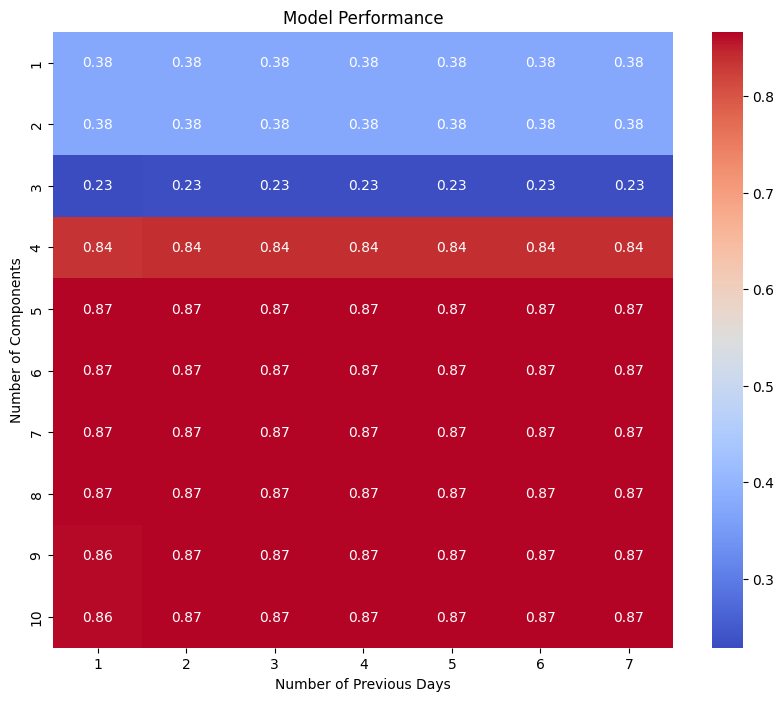

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an array to store the scores for different combinations of n_components and num_previous_days
scores = np.zeros((len(n_component_values), len(arr_previous_days)))

# Loop through each combination and calculate the score
for n_index, n in enumerate(n_component_values):
    tmp_model = GaussianHMM(n_components=n, random_state=123)
    tmp_model.fit(features)

    for d_index, tmp_num_previous_days in enumerate(arr_previous_days):
        sample_weather = np.linspace(0.0, 4.0, 5)
        test_size = test_data.shape[0]
        tmp_predicted_weather = []

        for i in range(test_size):
            previous_days_start_index = max(0, i - tmp_num_previous_days)
            previous_days_end_index = max(0, i)
            previous_days = extract_features(augment_features(test_data.iloc[previous_days_start_index:previous_days_end_index]))

            likelihood_scores = []
            for weather in sample_weather:
                current_day = [test_data['Encode Season'][i], test_data['Encode Temp'][i], test_data['Encode Precipitation'][i], test_data['Encode Wind'][i], weather]
                sequence = np.row_stack((previous_days, current_day))
                likelihood_scores.append(tmp_model.score(sequence))

            most_probable_weather = sample_weather[np.argmax(likelihood_scores)]
            tmp_predicted_weather.append(most_probable_weather)

        # Calculate the score using your score function (you might need to modify this line)
        scores[n_index, d_index] = score(tmp_predicted_weather)

# Create a heatmap to visualize the scores
plt.figure(figsize=(10, 8))
sns.heatmap(scores, annot=True, cmap='coolwarm', xticklabels=arr_previous_days, yticklabels=n_component_values)
plt.title('Model Performance')
plt.xlabel('Number of Previous Days')
plt.ylabel('Number of Components')
plt.show()




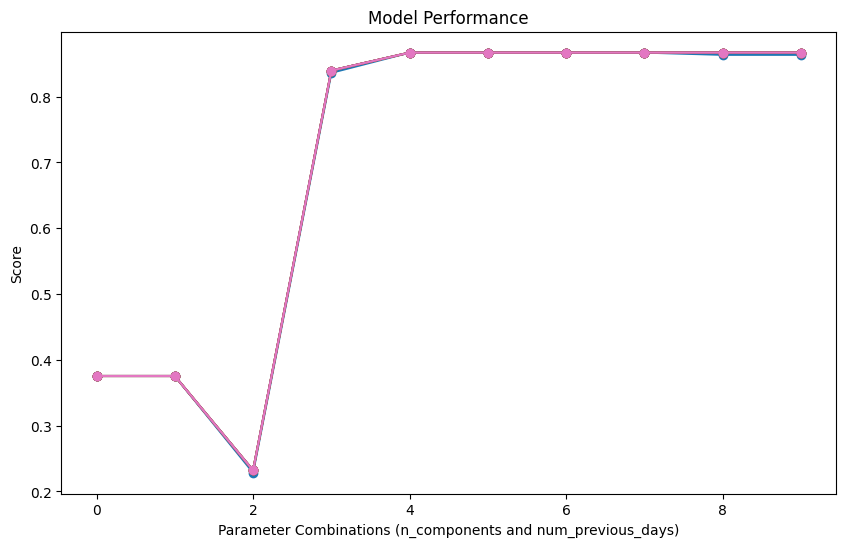

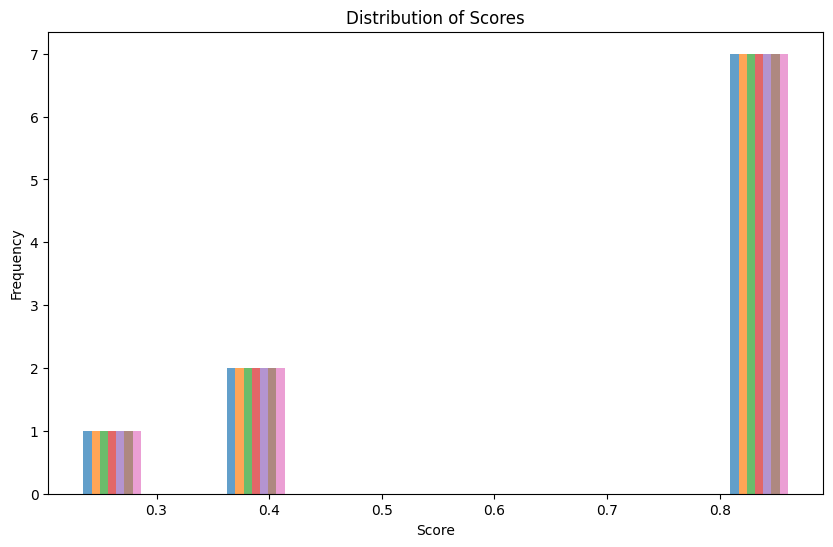

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o', linestyle='-')
plt.title('Model Performance')
plt.xlabel('Parameter Combinations (n_components and num_previous_days)')
plt.ylabel('Score')
plt.show()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, alpha=0.7)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()